### 1. Brief presentation of the dataset (what it describes).
Its purpose is to help diagnose erythema-squamous diseases to solve the problem of their differential diagnosis in the field of dermatology. Their diagnosis is a real dermatological problem because all the related diseases have similar symptoms. Specifically, the 6 diseases being attempted to diagnose are: psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris.
<br>
<br>
Participating patients were clinically examined for 12 characteristics, and then each dermal sample was taken to test another 22 histopathological characteristics. Each of these attributes received a value of 0 to 3 (0 = absent feature, 1-2 = moderate, 3 = notable attribute)

It also took into account the history of each patient in the sense of whether any of the 6 diseases in question has occurred in another family member (arithmetical boolean: 0 = NO, 1 = YES). Also, the age of patients was also noted.
<br>
<br>
The names and patient IDs have been removed.
### 2. Number of samples:
366
### Number of features:
34
### Attribute Type:
-32 refer to diseases and are linear, from 0 to 3, for disease (0 = not apparent, 3 = obvious, 1.2 = moderate)
    -1 refers to whether this problem has occurred in another family member (history) is a boolean arithmetic attribute.
    -1 refers to age
### Are there unsorted features and what are they?
No
### 3. Are there headlines? Line numbering?
No
### 4. What are the labels of classes and what columns are there?
The labels were separate in the corresponding name file and are as follows:
1: erythema
      2: scaling
      3: Defined borders
      4: itching
      5: koebner phenomenon
      6: polygonal papules
      7: follicular papules
      8: oral mucosal involvement
      9: knee and elbow involvement
     10: scalp involvement
     11: family history, (0 or 1)
     34: Age (linear)

     Histopathological Attributes: (take values ​​0, 1, 2, 3)
     12: melanin incontinence
     13: eosinophils in the infiltrate
     14: Infiltrated PNL
     15: fibrosis of the papillary dermis
     16: exocytosis
     17: acanthosis
     18: hyperkeratosis
     19: parakeratosis
     20: clubbing of the rete ridges
     21: elongation of the rete ridges
     22: thinning of the suprapapillary epidermis
     23: spongiform pustule
     24: munro microabcess
     25: focal hypergranulosis
     26: disappearance of the granular layer
     27: vacuolization and damage of basal layer
     28: spongiosis
     29: saw-tooth appearance of retes
     30: follicular horn plug
     31: perifollicular parakeratosis
     32: inflammatory monoluclear inflitrate
     33: band-like infiltrate
### 5. Did you need to make conversions to text files and what?
The only change we had to make was missing prices. For more details on the next question.
### 6. Are there any missing prices? How many samples are missing and what percentage of the total?
As shown below in the code, 8 samples were found which included absent values ​​(in particular, age). 8/366 = 2.18% <5% - therefore, according to the assumption of the exercise, we can simply remove the specimens.
### 7. What is the number of classes and their sample rates on the whole?
There are 6 classes (1-6):
Class code: Class: Number of instances: Instance percentage (%): <br>
       1 psoriasis 112 30,60 <br>
       2 seboreic dermatitis 61 16,67 <br>
       3 lichen planus 72 19,67 <br>
       4 pityriasis rosea 49 13.38 <br>
       5 chronic dermatitis 52 14,20 <br>
       6 pityriasis rubra pilaris 20 5.46 <br>

### If we consider that a dataset is unbalanced if any class is 1.5 times more frequent than another (60% -40% in binary datasets), estimate the balance of the dataset.
 If we take the two classes with the largest difference, namely 1, 6, we will see that 1 is 5.6 times more frequent than 6. According to the assumption for the dataset balance, 5.6> 1.5, the dataset is unbalanced .
### 8. Separate into train and test set. If there are missing values ​​and unordered features, manage and justify your choices

### First, we update our libraries

In [0]:
!apt update
!pip install --upgrade pip
!pip install -U imbalanced-learn
!pip install --upgrade scikit-learn
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [281 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [757 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security/universe amd

In [0]:
import warnings
warnings.filterwarnings('ignore')

### We upload the dermatology.csv file containing the dataset data.

In [0]:
!ls

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


sample_data


Saving dermatology.csv to dermatology.csv
User uploaded file "dermatology.csv" with length 25964 bytes


### We know that missing values have been replaced with "?", So we look up if they appear on one of the samples. If there is a sample rate of less than 5%, remove these samples.

In [0]:
!cat dermatology.csv | grep "?" | wc -l
!cat dermatology.csv | grep -v "?" > nomissing.dermatology.csv

8


### Display the lines for confirmation

In [0]:

import pandas as pd

df = pd.read_csv("nomissing.dermatology.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


### Since we do not have different data types in the dataframe, we can convert it directly into a numpy array. We remove column 34 (it is the 35th column, starting with 0), which refers to the 6 classes, as the purpose is to be able to be identified based on the rest of the data.

In [0]:
import numpy as np
np_data = df.values 
features = np_data[:,0:-1]
print(features.shape)
labels = np_data[:,-1].astype(int) # για να δουλέψει η bincount πρέπει να κάνουμε cast τα labels από float σε int
print(labels.shape)
frequencies = np.bincount(labels)
print("class frequencies: ", frequencies)
total_samples = frequencies.sum()
print("total samples: ", total_samples)
percentage = (frequencies / total_samples) * 100
print("class percentage: ", percentage)

(358, 34)
(358,)
class frequencies:  [  0 111  60  71  48  48  20]
total samples:  358
class percentage:  [ 0.         31.00558659 16.75977654 19.83240223 13.40782123 13.40782123
  5.58659218]


### After dividing the dataset into train (80%) and test (20%) set, we can immediately apply the Dummy Classifier. In the case of constant strategy, we will have 6 different cases, as so are the dataset classes. Finally, by applying what the system has "learned" in the test set, we can see both the F1 scores and the Confusions Matrices for each Dummy Classifier's strategy.

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)

from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_constant_3 = DummyClassifier(strategy="constant", constant=3)
dc_constant_4 = DummyClassifier(strategy="constant", constant=4)
dc_constant_5 = DummyClassifier(strategy="constant", constant=5)
dc_constant_6 = DummyClassifier(strategy="constant", constant=6)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")     
  
DERM_f1micro = {}
DERM_matrixes = {}
DERM_f1macro = {}
###for every dummy test###
model = dc_uniform.fit(train, train_labels)
test_labels=np.reshape(test_labels,(-1,1))
pred = model.predict(test_labels)
DERM_matrixes['uniform']  = confusion_matrix(test_labels, pred)
DERM_f1micro['uniform'] = precision_recall_fscore_support(test_labels, pred, average='micro')
DERM_f1macro['uniform'] = precision_recall_fscore_support(test_labels, pred, average='macro')
####
model = dc_constant_1.fit(train, train_labels)
pred = model.predict(test_labels)
DERM_matrixes['constant 1']  = confusion_matrix(test_labels, pred)
DERM_f1micro['constant 1'] = precision_recall_fscore_support(test_labels, pred, average='micro')
DERM_f1macro['constant 1'] = precision_recall_fscore_support(test_labels, pred, average='macro')
####
model = dc_constant_2.fit(train, train_labels)
pred = model.predict(test_labels)
DERM_matrixes['constant 2']  = confusion_matrix(test_labels, pred)
DERM_f1micro['constant 2'] = precision_recall_fscore_support(test_labels, pred, average='micro')
DERM_f1macro['constant 2'] = precision_recall_fscore_support(test_labels, pred, average='macro')
####
model = dc_constant_3.fit(train, train_labels)
pred = model.predict(test_labels)
DERM_matrixes['constant 3']  = confusion_matrix(test_labels, pred)
DERM_f1micro['constant 3'] = precision_recall_fscore_support(test_labels, pred, average='micro')
DERM_f1macro['constant 3'] = precision_recall_fscore_support(test_labels, pred, average='macro')
####
model = dc_constant_4.fit(train, train_labels)
pred = model.predict(test_labels)
DERM_matrixes['constant 4']  = confusion_matrix(test_labels, pred)
DERM_f1micro['constant 4'] = precision_recall_fscore_support(test_labels, pred, average='micro')
DERM_f1macro['constant 4'] = precision_recall_fscore_support(test_labels, pred, average='macro')
####
model = dc_constant_5.fit(train, train_labels)
pred = model.predict(test_labels)
DERM_matrixes['constant 5']  = confusion_matrix(test_labels, pred)
DERM_f1micro['constant 5'] = precision_recall_fscore_support(test_labels, pred, average='micro')
DERM_f1macro['constant 5'] = precision_recall_fscore_support(test_labels, pred, average='macro')
####
model = dc_constant_6.fit(train, train_labels)
pred = model.predict(test_labels)
DERM_matrixes['constant 6']  = confusion_matrix(test_labels, pred)
DERM_f1micro['constant 6'] = precision_recall_fscore_support(test_labels, pred, average='micro')
DERM_f1macro['constant 6'] = precision_recall_fscore_support(test_labels, pred, average='macro')
####
model = dc_most_frequent.fit(train, train_labels)
pred = model.predict(test_labels)
DERM_matrixes['most freq label']  = confusion_matrix(test_labels, pred)
DERM_f1micro['most freq label'] = precision_recall_fscore_support(test_labels, pred, average='micro')
DERM_f1macro['most freq label'] = precision_recall_fscore_support(test_labels, pred, average='macro')
####
model = dc_stratified.fit(train, train_labels)
pred = model.predict(test_labels)
DERM_matrixes['stratified']  = confusion_matrix(test_labels, pred)
DERM_f1micro['stratified'] = precision_recall_fscore_support(test_labels, pred, average='micro')
DERM_f1macro['stratified'] = precision_recall_fscore_support(test_labels, pred, average='macro')
####

print("confusion matrixes  on the DERM Dataset (30% test set)\n")
for k in DERM_matrixes:
    print(k,"\n",DERM_matrixes[k])
print("\n f1micro results in ascending order:\n")
sorted_micro = [(k, DERM_f1micro[k]) for k in sorted(DERM_f1micro, key=DERM_f1micro.get, reverse=False)]
sorted_micro_final=[]

for k, v in sorted_micro:
  print(k,v[2])
  sorted_micro_final.append([k,v[2]])
#print(sorted_micro_final)

print("\n f1macro results in ascending order:\n")
sorted_macro = [(k, DERM_f1macro[k]) for k in sorted(DERM_f1macro, key=DERM_f1macro.get, reverse=False)]
sorted_macro_final=[]
for k, v in sorted_macro:
  print(k,v[2])  
  sorted_macro_final.append([k,v[2]])







confusion matrixes  on the DERM Dataset (30% test set)

uniform 
 [[4 5 3 5 3 5]
 [0 1 3 2 3 0]
 [1 1 2 3 2 2]
 [2 0 3 2 4 2]
 [1 3 1 5 0 0]
 [0 1 1 0 1 1]]
constant 1 
 [[25  0  0  0  0  0]
 [ 9  0  0  0  0  0]
 [11  0  0  0  0  0]
 [13  0  0  0  0  0]
 [10  0  0  0  0  0]
 [ 4  0  0  0  0  0]]
constant 2 
 [[ 0 25  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  4  0  0  0  0]]
constant 3 
 [[ 0  0 25  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  4  0  0  0]]
constant 4 
 [[ 0  0  0 25  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  4  0  0]]
constant 5 
 [[ 0  0  0  0 25  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  4  0]]
constant 6 
 [[ 0  0  0  0  0 25]
 [ 0  0  0  0  0  9]
 [ 0  0  0  0  0 11]
 [ 0  0  0  0  0 13]
 [ 0  0  0  0  0 10]
 [ 0  0  0  0  0  4]]
mos

###Στην περίπτωση του kNN Classifier πρέπει να γίνει προ-επεξεργασία των δεδομένων για να βρεθούν οι βέλτιστες υπερ-παράμετροι.
Συγκεκριμένα, ακολουθείται η παρακάτω διαδικασία:
<br>
1) Όπως είδαμε παραπάνω, το dataset δεν είναι ισορροπημένο, καθώς υπάρχει μεγάλη διαφορά στην ποσόστωση των κλάσεων μεταξύ τους. Επομένως, αρχικά, εφαρμόζουμε την τεχνική του oversampling, για να ισορροπήσουμε το dataset χωρίς να χάσουμε από τα πραγματικά δεδομένα. Το oversampling αφορά τις "γραμμές", δηλαδή τον αριθμό των δειγμάτων που έχει το train set. Μετά το πέρας του oversamping (το οποίο γίνεται μία φορά για το train set) όπως είναι αναμενόμενο, όλες οι κλάσεις εμφανίζονται με την ίδια ποσόστωση (16.67%)
<br>
<br>
2) Στη συνέχεια, θα γίνει η προεπεξεργασία των στηλών του dataset, δηλαδή των χαρακτηριστικών. Συγκεκριμένα, μας ενδιαφέρει να:
<br>
α) αφαιρέσουμε στήλες που δεν που δεν προσθέτουν πληροφορία (π.χ. στήλες που έχουν την ίδια ή πολύ κοντινή τιμή για όλους τους ασθενείς και επομένως δεν αποτελούν κριτήριο για τη διάγνωσή τους) με το Variance Threshold. Εμπειρικά, τρέχοντας το συγκεκριμένο κομμάτι και εξετάζοντας τα αποτελέσματα, παρατηρήσαμε ότι "κόβονται" στήλες για διακυμάνσεις μεταξύ 0 και 0.5, οπότε αυτό είναι και το range που εξετάζουμε. Το βήμα επιλέχθηκε αυθαίρετα.
<br>
β) ομαδοποιήσουμε στήλες που δεν είναι γραμμικά ανεξάρτητες μεταξύ τους, βρίσκοντας τα αντίστοιχα ιδιοδιανύσματα, οπότε εν τέλει να καταλήξουμε σε λιγότερα υπερ-χαρακτηριστικά με βάση τα οποία θα διαγνώσκονται οι ασθενείς για τις 6 εξεταζόμενες ασθένειες. Αυτή η διαδικασία πραγματοποιήθηκε με το PCA. Εφόσον στο PCA εμείς επιβάλουμε τον αριθμό των χαρακτηριστικών που θα παραμείνουν, κινηθήκαμε εξαντλητικά (το train test περιλαμβάνει τόσες στήλες-χαρακτηριστικά, όσες έχουν προκύψει από τη διαδικασία με το Variance Threshold παραπάνω.
<br>
Η παραπάνω διαδικασία για την προ-επεξεργασία των χαρακτηριστικών γίνεται κατ'επανάληψη για όλους τους πιθανούς συνδυασμούς train sets - δηλαδή για κάθε τριάδα train sets που έχουν τροποποιηθεί ως προς τον αριθμό των αρχικών χαρακτηριστικών, των υπερ-χαρακτηριστικών αλλά και ως προς τον αριθμό των γειτόνων k, το range των οποίων επιλέχθηκε να είναι τόσο όσα και τα δείγματα ανά κλάση από το oversampling (εδώ 86), το οποίο επιλέξαμε γιατί παρατηρήσαμε ότι οι δείκτες F1 μειώνονταν πάρα πολύ για μεγαλύτερα k και δε θα είχε νόημα.
<br>
<br>
Στη συνέχεια, για καθένα από αυτά τα train tests, πραγματοποιείται 10-fold cross-validation, με κριτήριο scoring τα F1 Micro & F1 Macro. Στο τέλος αυτού του loop, μας γνωστοποιούνται οι 2 3άδες με τα καλύτερα F1 Micro & F1 Macro.
<br>
<br>
Σημείωση: τα cnt1,2 χρησιμοποιήθηκαν απλά για να βλέπουμε εμείς (από περιέργια) πόσες φορές βρήκε η διαδικασία καλύτερο mean. Δε χρησιμεύει κάπου.

In [0]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#train, test, train_labels, test_labels are initialized from before
cnt1=0
cnt2=0
ros = RandomOverSampler()
train_resampled,train_labels_resampled = ros.fit_sample(train,train_labels)
x=(np.bincount(train_labels_resampled))
#print(x)

for i in range(0,50,5):  #make it decimal 
  # αρχικοποιούμε έναν selector
  selector = VarianceThreshold(i/100)
  # όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
  train_reduced = selector.fit_transform(train_resampled)
  #print(train_reduced)
  #features = train_reduced
  #print(features.shape)
  # φτιάχνουμε μια μάσκα που μας λέει άν ο selector κρατάει ένα χαρακτηριστικό η όχι
  mask = selector.get_support()
  #print(mask)
  test_reduced = selector.transform(test)
  #print(test_reduced)
  #features = test_reduced
  #print(features.shape)
  summ=np.bincount(train_labels)
  #if (max(summ[1:]/min(summ[1:])))>2/3
  
  col = train_reduced.shape[1] 
  for j in range(1,col,1):
    # Ορίζουμε την PCA και τον τελικό αριθμό features - αριθμό κύριων συνιστωσών
    # είναι ακόμα μια υπερπαράμετρος με την οποία μπορούμε να πειραματιστούμε
    pca = PCA(n_components=j)

    # Εφαρμόζουμε στα δεδομένα εκπαίδευσης και ελέγχου τον *ΙΔΙΟ* μετασχηματισμό
    # Οι κύριες συνιστώσες υπολογίζονται στο train set
    # Στα train κάνουμε fit_transform στο test μόνο transform:
    trainPCA = pca.fit_transform(train_reduced)
    testPCA = pca.transform(test_reduced)

    #print("Train Reduced:", train_reduced.shape)
    #print("Train PCA:", trainPCA.shape)
    #print("Test Reduced:", test_reduced.shape)
    #print("Test PCA:", testPCA.shape)
    
    #φτιάχνουμε μια λίστα από το 1 έως το max του oversampler
 
    myList = list(range(86,1,-1))
    # Κρατάμε μόνο τα περιττά k
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    # empty list that will hold cv scores
    # perform 5-fold cross validation
    max_micro = 0
    max_macro = 0
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        
        s_micro = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_micro')
        s_macro = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_macro')
        if s_micro.mean() >= max_micro:
            max_micro=s_micro.mean()
            cnt1=cnt1+1
            #print("cnt1=",cnt1)
            
            i_micro, j_micro, k_micro = i, j, k
        if s_macro.mean() >= max_macro:
            max_macro=s_macro.mean()
            cnt2=cnt2+1
            #print("cnt2=",cnt2)
            i_macro, j_macro, k_macro = i, j, k

    
print(i_macro, j_macro, k_macro)
print(i_micro, j_micro, k_micro)
print(cnt1,cnt2)
    



45 27 3
45 27 3
11433 11124


### Because we forgot to print for the final groups max macro mean and max micro mean, we are redirecting the above code for that particular group. We also print the kNN Confusion Matrix.

In [0]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#train, test, train_labels, test_labels are initialized from before
cnt1=0
cnt2=0
ros = RandomOverSampler()
train_resampled,train_labels_resampled = ros.fit_sample(train,train_labels)
x=(np.bincount(train_labels_resampled))
#print(x)

i=45
j=27
k=3
# αρχικοποιούμε έναν selector
selector = VarianceThreshold(i/100)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train_resampled)
#print(train_reduced)
#features = train_reduced
#print(features.shape)
# φτιάχνουμε μια μάσκα που μας λέει άν ο selector κρατάει ένα χαρακτηριστικό η όχι
mask = selector.get_support()
#print(mask)
test_reduced = selector.transform(test)
#print(test_reduced)
#features = test_reduced
#print(features.shape)
summ=np.bincount(train_labels)
#if (max(summ[1:]/min(summ[1:])))>2/3

col = train_reduced.shape[1] 
# Ορίζουμε την PCA και τον τελικό αριθμό features - αριθμό κύριων συνιστωσών
# είναι ακόμα μια υπερπαράμετρος με την οποία μπορούμε να πειραματιστούμε
pca = PCA(n_components=j)

# Εφαρμόζουμε στα δεδομένα εκπαίδευσης και ελέγχου τον *ΙΔΙΟ* μετασχηματισμό
# Οι κύριες συνιστώσες υπολογίζονται στο train set
# Στα train κάνουμε fit_transform στο test μόνο transform:
trainPCA = pca.fit_transform(train_reduced)
testPCA = pca.transform(test_reduced)

#print("Train Reduced:", train_reduced.shape)
#print("Train PCA:", trainPCA.shape)
#print("Test Reduced:", test_reduced.shape)
#print("Test PCA:", testPCA.shape)

#φτιάχνουμε μια λίστα από το 1 έως το max του oversampler

myList = list(range(86,1,-1))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
# perform 5-fold cross validation
max_micro = 0
max_macro = 0
knn = KNeighborsClassifier(n_neighbors=k)

s_micro = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_micro')
s_macro = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_macro')
if s_micro.mean() >= max_micro:
    max_micro=s_micro.mean()
    cnt1=cnt1+1
    #print("cnt1=",cnt1)

    i_micro, j_micro, k_micro = i, j, k
if s_macro.mean() >= max_macro:
    max_macro=s_macro.mean()
    cnt2=cnt2+1
    #print("cnt2=",cnt2)
    i_macro, j_macro, k_macro = i, j, k

    
print("Max Macro Mean= ", max_macro, "\nMax Micro Mean= ", max_micro, "\n")


knn.fit(trainPCA, train_labels_resampled)
pred = knn.predict(testPCA)

#Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, pred)
# τυπώνουμε τα labels
# τυπώνουμε το confusion matrix
print("Confusion Matrix:\n", cnf_matrix)

Max Macro Mean=  0.8490848854161548 
Max Micro Mean=  0.8739770662740629 

Confusion Matrix:
 [[19  0  0  0  0  0]
 [ 0  8  0  5  1  0]
 [ 0  0 16  0  0  0]
 [ 0  2  0  7  0  0]
 [ 1  0  0  0  7  0]
 [ 0  0  0  1  0  5]]


### Finally, we show 2 bar graphs for the F1 micro & macro of the classifiers used (different types of Dummy Classifier, kNN)
It seems that the only case where the F1 score, either micro or macro, is high, close to 1, is in the case of the optimized kNN Classifier, which is also expected. The same conclusion comes from comparing tables of confusion between classifiers (as well as F1 scores in true positives, false negatives and false positives are based).

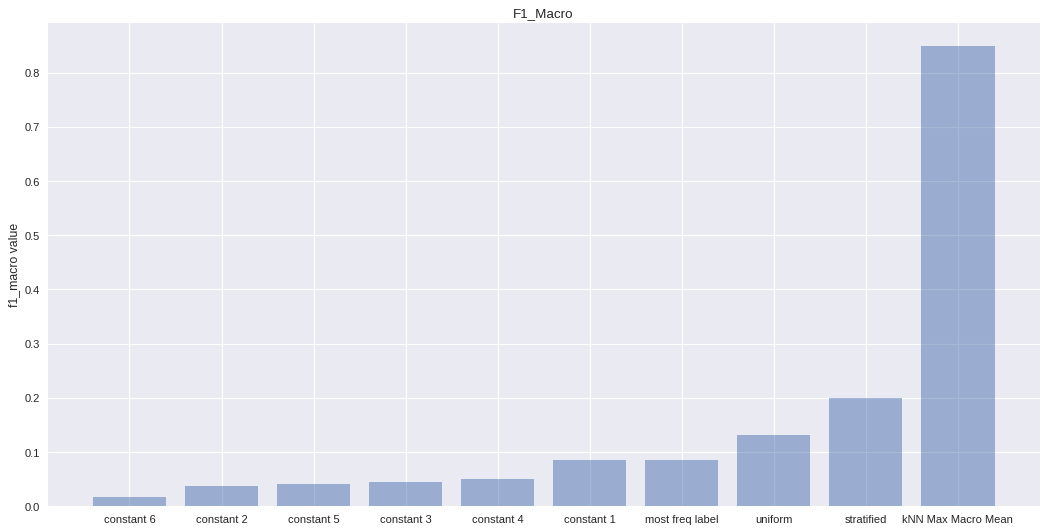

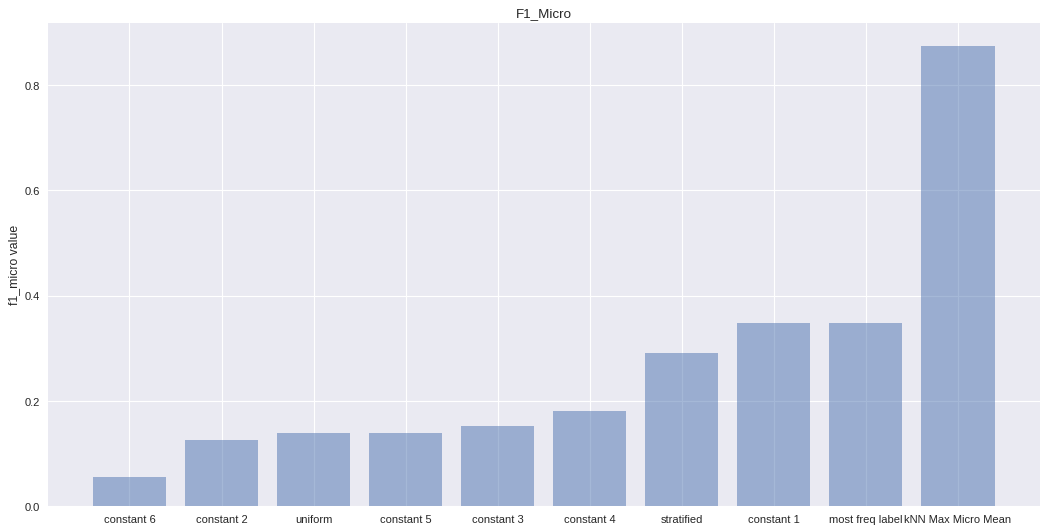

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#plot of macro#
sorted_macro_final.append(['kNN Max Macro Mean',max_macro])
figure(num=None, figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
objects=[item[0] for item in sorted_macro_final]
performance=[item[1] for item in sorted_macro_final]
plt.bar(np.arange(len(objects)), performance, align='center', alpha=0.5)
plt.xticks(np.arange(len(objects)), objects)
plt.ylabel('f1_macro value')
plt.title('F1_Macro')
plt.show()
#plot for micro#
sorted_micro_final.append(['kNN Max Micro Mean',max_micro])
figure(num=None, figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
objects=[item[0] for item in sorted_micro_final]
performance=[item[1] for item in sorted_micro_final]
plt.bar(np.arange(len(objects)), performance, align='center', alpha=0.5)
plt.xticks(np.arange(len(objects)), objects)
plt.ylabel('f1_micro value')
plt.title('F1_Micro')
plt.show()